In [ ]:
#

In [9]:
import numpy as np
import pandas as pd
import talib
#print(talib.get_functions())
lab = talib.get_functions()
print(len(lab))
lab_dict = talib.get_function_groups()
lab_dict.keys()

158


dict_keys(['Cycle Indicators', 'Math Operators', 'Math Transform', 'Momentum Indicators', 'Overlap Studies', 'Pattern Recognition', 'Price Transform', 'Statistic Functions', 'Volatility Indicators', 'Volume Indicators'])

In [21]:
# 使用talib畫出RSI指標
data = pd.read_csv('2377.csv')
stocks_close = data['close']
rsi = talib.RSI(stocks_close)
print(rsi)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
472    63.665211
473    67.491228
474    60.617291
475    63.915529
476    56.749902
Length: 477, dtype: float64


## 透過 Abstract API 去計算技術指標

In [22]:
from talib import abstract
abstract.RSI(data)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
472    63.665211
473    67.491228
474    60.617291
475    63.915529
476    56.749902
Length: 477, dtype: float64

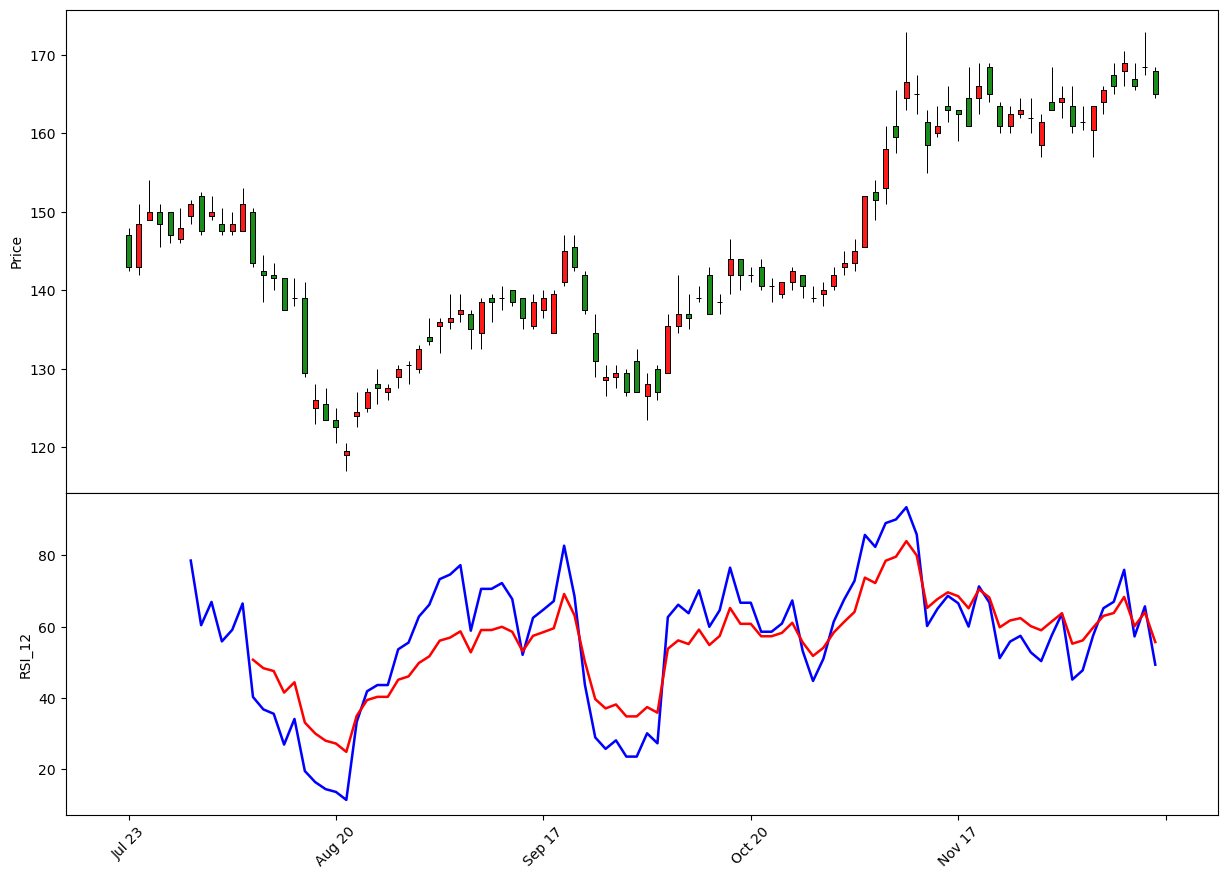

In [25]:
import pandas as pd
import mplfinance as mpf
import numpy as np
from talib import abstract

stocks = pd.read_csv('2377.csv')
stocks.index = pd.DatetimeIndex(stocks["Date"])
stocks = stocks.tail(100)


colorSet = mpf.make_marketcolors(up = 'r', down = 'g')
styleSet = mpf.make_mpf_style(marketcolors = colorSet)
kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

#使用talib
stocks.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
rsi_6 = abstract.RSI(stocks, 6)
rsi_12 = abstract.RSI(stocks, 12)

draw = [
            mpf.make_addplot(rsi_6, panel = 1, color = 'blue', ylabel = 'RSI_6'),
            mpf.make_addplot(rsi_12, panel = 1, color = 'red', ylabel = 'RSI_12')
       ]

mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (3, 2))